### Importing librairies + Data

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas_datareader as pdr
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import quandl 
quandl.ApiConfig.api_key = "2f8TXxyiL2rd-j3e_ant"

values = pd.read_csv('data\mapping.csv', sep=';' )

In [3]:
values['ticker']= "EURONEXT/" + values['ticker']
for i in range (len(values)):
    values.nom[i]= values.nom[i].replace(' ','')
values = values.sort_values('nom')
values = values.reset_index(drop=True)

In [4]:
df_cac40=quandl.get(values['ticker'][0])
df_cac40.columns = pd.MultiIndex.from_product([[values['nom'][0]],df_cac40.columns])

for i in range (1, len(values)):
    temp=quandl.get(values['ticker'][i])
    temp.columns = pd.MultiIndex.from_product([[values['nom'][i]],temp.columns])
    df_cac40= pd.concat([df_cac40,temp],axis=1)
df_cac40

AirLiquide                                                  Airbus  \
                 Open    High     Low    Last     Volume      Turnover   Open   
Date                                                                            
2014-02-14      99.51  100.00   99.08  100.00   740908.0  7.397914e+07  52.07   
2014-02-17     100.00  100.30   99.20   99.33   657021.0  6.537874e+07  53.44   
2014-02-18     100.00  100.00   97.52   98.11  1060488.0  1.041123e+08  52.84   
2014-02-19      97.49   98.82   97.49   98.74   792538.0  7.790627e+07  52.75   
2014-02-20      97.43   98.58   97.20   98.58   796932.0  7.819688e+07  52.17   
...               ...     ...     ...     ...        ...           ...    ...   
2020-11-06     137.30  138.75  135.65  137.90   759274.0  1.043454e+08  69.52   
2020-11-09     139.70  144.45  139.40  142.15  1915989.0  2.725531e+08  71.80   
2020-11-10     141.65  142.55  140.20  141.15  1738052.0  2.458161e+08  82.42   
2020-11-11     141.50  142.35  140.70  141.70   821629.0  1.164960e+08  88.00   
2020-11-12     140.55  142.55  140.05  140.05  1024451.0  1.440138e+08  85.36   

                                 ... Vivendi                                   \
             High    Low   Last  ...     Low    Last     Volume      Turnover   
Date                             ...                                            
2014-02-14  53.32  52.07  53.20  ...  20.210  20.485  4844082.0  9.890304e+07   
2014-02-17  53.52  52.39  52.70  ...  20.380  20.525  2431495.0  4.980245e+07   
2014-02-18  53.08  52.45  52.98  ...  20.365  20.625  4785063.0  9.832510e+07   
2014-02-19  53.14  52.29  52.84  ...  20.600  20.895  5943791.0  1.236013e+08   
2014-02-20  52.73  51.79  52.57  ...  20.620  20.810  3213990.0  6.668570e+07   
...           ...    ...    ...  ...     ...     ...        ...           ...   
2020-11-06  71.00  68.81  70.00  ...  25.490  25.510  1997774.0  5.103499e+07   
2020-11-09  90.43  71.75  83.00  ...  25.620  25.770  5401268.0  1.401300e+08   
2020-11-10  88.93  81.80  87.92  ...  25.440  25.480  5020577.0  1.288112e+08   
2020-11-11  89.54  85.83  87.00  ...  25.410  25.560  3686133.0  9.377622e+07   
2020-11-12  86.48  83.33  84.61  ...     NaN     NaN        NaN           NaN   

           Worldline                                               
                Open   High    Low   Last     Volume     Turnover  
Date                                                               
2014-02-14       NaN    NaN    NaN    NaN        NaN          NaN  
2014-02-17       NaN    NaN    NaN    NaN        NaN          NaN  
2014-02-18       NaN    NaN    NaN    NaN        NaN          NaN  
2014-02-19       NaN    NaN    NaN    NaN        NaN          NaN  
2014-02-20       NaN    NaN    NaN    NaN        NaN          NaN  
...              ...    ...    ...    ...        ...          ...  
2020-11-06     68.16  71.74  67.66  70.80  1209370.0   84816130.0  
2020-11-09     72.20  77.44  72.02  76.78  1826395.0  136678963.0  
2020-11-10     76.60  76.98  73.56  73.56  1334542.0   99094073.0  
2020-11-11     73.50  74.50  73.02  73.88   837484.0   61795179.0  
2020-11-12       NaN    NaN    NaN    NaN        NaN          NaN  

[1696 rows x 240 columns]

## Data Visulisation

In [12]:
stockOfInterest = "Michelin"

In [14]:
df_cac40[stockOfInterest].Last[-n:]

Date
2020-02-04    106.30
2020-02-05    107.40
2020-02-06    106.45
2020-02-07    106.85
2020-02-10    106.75
               ...  
2020-11-06     97.20
2020-11-09    100.95
2020-11-10    103.70
2020-11-11    104.35
2020-11-12       NaN
Name: Last, Length: 200, dtype: float64

Text(0, 0.5, 'Worldwide gross revenue')

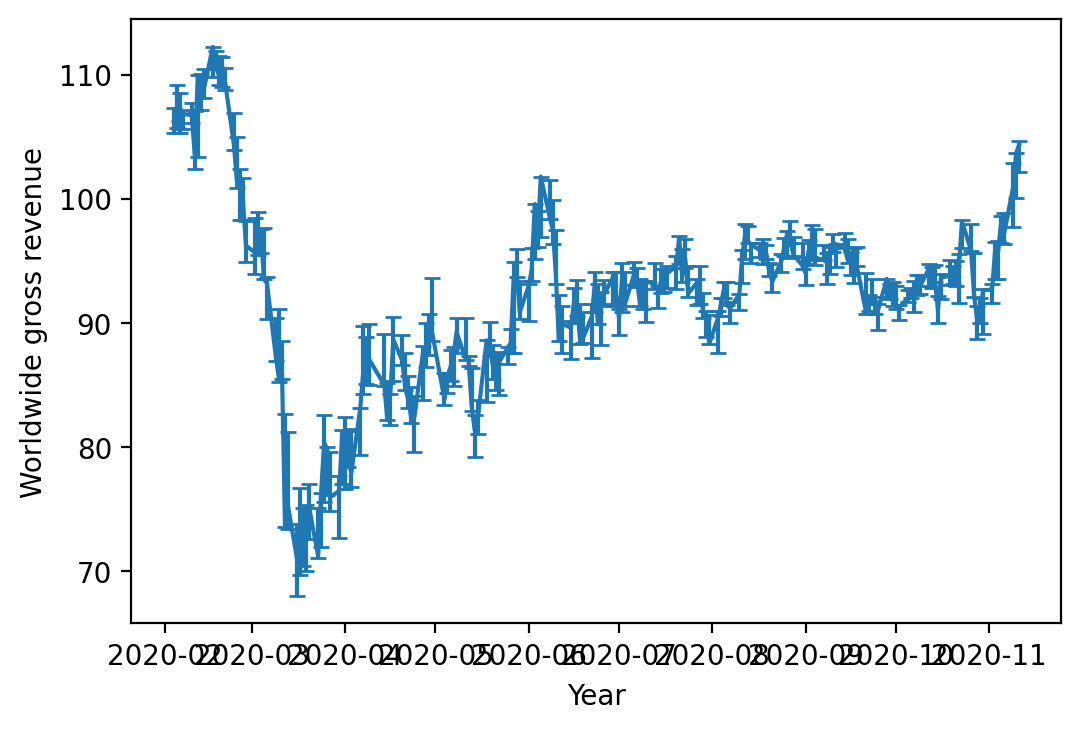

In [17]:
plt.figure(dpi=200)
n=200;
plt.errorbar(df_cac40.index[-n:], df_cac40[stockOfInterest].Last[-n:],
             yerr = [(df_cac40[stockOfInterest].Last[-n:]-df_cac40[stockOfInterest].Low[-n:]),
                     df_cac40[stockOfInterest].High[-n:]-df_cac40[stockOfInterest].Last[-n:]],
             capsize= 3)
plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')

In [33]:
grad_day=(df_cac40[stockOfInterest].Last-df_cac40[stockOfInterest].Open)/df_cac40[stockOfInterest].Open *100
grad_day

Date
2014-02-14   -0.446480
2014-02-17   -0.160293
2014-02-18   -1.732194
2014-02-19   -0.254335
2014-02-20    1.862631
                ...   
2020-11-06   -0.836564
2020-11-09    2.947175
2020-11-10    2.775025
2020-11-11    0.626808
2020-11-12         NaN
Length: 1696, dtype: float64

In [34]:
grad_2days=pd.DataFrame(index=df_cac40.index, columns = ["grad_2days"])
for i in range(2,len(df_cac40[stockOfInterest])):
    grad_2days=(df_cac40[stockOfInterest].Last[i]-df_cac40[stockOfInterest].Open[(i-2)])/2

In [35]:
grad_2days

nan

In [21]:
for j  in range (0, len(values)):
    df_cac40 = df_cac40.sort_index(axis=1)
    SMA=pd.DataFrame(index=df_cac40.index, columns = ["SMA2", "SMA5", "SMA10", "SMA30"])
    for i in range (len(df_cac40[values['nom'][j]])-1):
        SMA.SMA2[i+1]= sum(df_cac40[values['nom'][j]]['Last'][i:i+2]) /2
    for i in range (len(df_cac40[values['nom'][j]])-4):   
        SMA.SMA5[i+4]= sum(df_cac40[values['nom'][j]]['Last'][i:i+5]) /5
    for i in range (len(df_cac40[values['nom'][j]])-9):   
        SMA.SMA10[i+9]= sum(df_cac40[values['nom'][j]]['Last'][i:i+10]) /10
    for i in range (len(df_cac40[values['nom'][j]])-29):   
        SMA.SMA30[i+29]= sum(df_cac40[values['nom'][j]]['Last'][i:i+30]) /30
        df_cac40[values['nom'][j],'SMA2'] = SMA.SMA2
    df_cac40[values['nom'][j], 'SMA5'] = SMA.SMA5
    df_cac40[values['nom'][j], 'SMA10'] = SMA.SMA10
    df_cac40[values['nom'][j], 'SMA30'] = SMA.SMA30

In [37]:
df_cac40.Michelin

,High,Last,Low,Open,SMA10,SMA2,SMA30,SMA5,Turnover,Volume
Date,,,,,,,,,,
2014-02-14,87.82,86.96,86.73,87.35,NaN,NaN,NaN,NaN,6.259576e+07,718623.0
2014-02-17,87.78,87.20,87.19,87.34,NaN,87.08,NaN,NaN,3.871114e+07,442879.0
2014-02-18,87.75,86.23,85.62,87.75,NaN,86.715,NaN,NaN,6.110960e+07,707589.0
2014-02-19,86.99,86.28,85.75,86.50,NaN,86.255,NaN,NaN,3.429624e+07,397680.0
2014-02-20,87.64,87.50,85.50,85.90,NaN,86.89,NaN,86.834,6.502345e+07,747232.0
...,...,...,...,...,...,...,...,...,...,...
2020-11-06,98.88,97.20,96.38,98.02,94.136,97.66,93.4807,95.928,4.837004e+07,496713.0
2020-11-09,102.90,100.95,97.70,98.06,94.647,99.075,93.727,97.578,1.119311e+08,1111481.0
2020-11-10,103.70,103.70,100.05,100.90,95.787,102.325,94.1023,99.146,8.802708e+07,855082.0


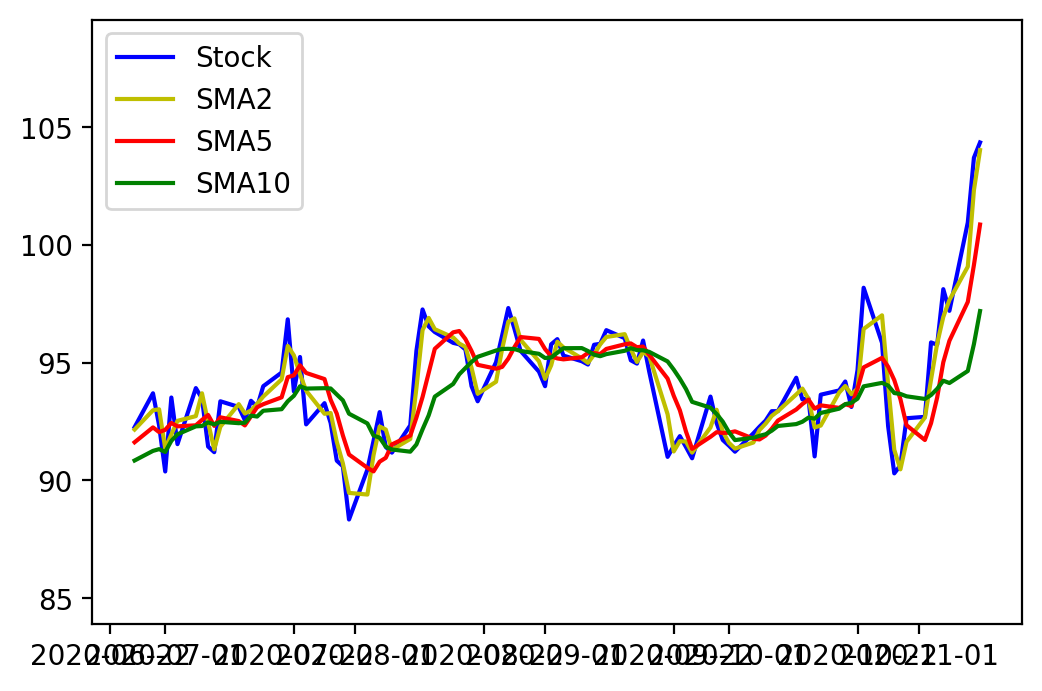

In [40]:
n=100
plt.figure(dpi=200)
plt.ylim(0.95*min(df_cac40[stockOfInterest].Last[-n:]), 1.05*max(df_cac40[stockOfInterest].Last[-n:]))
plt.plot(df_cac40.index[-n:], df_cac40[stockOfInterest].Last[-n:], 'b', label='Stock')
plt.plot(df_cac40.index[-n:], df_cac40[stockOfInterest].SMA2[-n:], 'y', label='SMA2')
plt.plot(df_cac40.index[-n:], df_cac40[stockOfInterest].SMA5[-n:], 'r', label='SMA5')
plt.plot(df_cac40.index[-n:], df_cac40[stockOfInterest].SMA10[-n:], 'g', label='SMA10')
#plt.plot(df_cac40.index[-n:], SMA.SMA30[-n:], 'c', label='SMA30')
#plt.plot(df_cac40.index[-n:], grad_2days[-n:])
plt.legend()
plt.show()

Si stock > SMA10 -> buy
Else if stock < SMA2 -> sell
Else wait